# Project: No Shows to Medical Appointments- [noshowappointment-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information of over 100k medical appointments in Brazil and poses the question of whether or not patients show up for their appointments. It has a total of 14 attributes with descriptions below.

|Attribute| Description
:---| ---
|**Patientid** | Identification of patient|
|**Appointmentid** | Identification of each appointment|
|**Gender** | Male(M) or Female(F)|
|**ScheduledDay** | The day of the actual appointment, when they have to visit the doctor.|
|**AppointmentDay** | The day someone called or registered the appointment.|
|**Age** | How old the patient is.|
|**Neighbourhood** | Where the appointment takes place.|
|**Scholarship** | True or False denoted as 1 and 0 respectively. To know more about this, consider reading the [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)|
|**Hipertension** | True or False denoted as 1 and 0 respectively.|
|**Diabetes** | True or False denoted as 1 and 0 respectively.|
|**Alcoholism** | True or False denoted as 1 and 0 respectively.|
|**Handcap** | True or False. where, False = 0 and True = 1 and above.|
|**SMS_received** | 1 or more messages sent to the patient.|
|**No-show** | True or False.

### Question(s) for Analysis
 
 
 #### Q1: What gender cares for their body the most and showed up more for the appointments?
 #### Q2: Does being handicap affect the presence or absence of patients?
 #### Q3: Which neighbourhood had the most no shows to appointment.? 
 #### Q4: Does age affect the possibility of a patient showing up for the appointment?
 #### Q5: Is no-show affected by the whether or not a patient received an sms as a reminder?

In [1]:
# importing statements for all packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.6MB/s eta 0:00:01 1% |▌                               | 174kB 8.5MB/s eta 0:00:02    25% |████████▎                       | 2.7MB 28.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01   27% |████████▉                       | 3.7MB 22.7MB/s eta 0:00:01    36% |███████████▊                    | 4.9MB 25.1MB/s eta 0:00:01    44% |██████████████▎                 | 6.0MB 20.4MB/s eta 0:00:01    51% |████████████████▋               | 7.0MB 20.9MB/s eta 0:00:01    85% |███████████████████████████▎    | 11.4MB 25.7MB/s eta 0:00:01    91% |█████████████████████████████▎  | 12.3MB 20.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninsta

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
# Load your data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data
#checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [53]:
#inspecting the datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [58]:
#checking for duplicate rows
sum(df.duplicated())

0

In [4]:
#viewing descriptive stat of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [54]:
# To see all patient with a negative age
df_neg_age = df[df['Age'].astype(str).str.contains('-')]
df_neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
 
  From the inspections above, it can be seen that there is no missing value or duplicate row(s)  and all the data types are in the right format except that of the appointmentday and scheduledday which should be in datetime format. But, i would like to change some column names to the right spelling and change all the cases to lower case for convenient selection.
Also, the descriptive statistics show that there is an errant value(i.e, a number with a negative value) in the Age column.

In [56]:
#changing datatypes from object to datetime
data_column = ['AppointmentDay', 'ScheduledDay']
for c in data_column:
    df[c] = pd.to_datetime(df[c])

#checking operation
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [45]:
#Drop row(s) with negative age df_neg_age
df.drop(df_neg_age.index, inplace = True)

#confirm the above operation
df[df['Age'].astype(str).str.contains('-')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [46]:
# Renaming columns and changing cases
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns = lambda x:x.lower(), inplace = True)

#confirm the above operation
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [47]:
#save the clean data as csv file
#to be accessed for further analysis
df.to_csv('noappointments-kagglev2_edited.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

**we're going to explore the new dataset(noappoointments-kagglev2_edited.csv) saved in the cleaning phase.**

**Note: Yes in the no-show column = missed the appointment** 
**while, No in the no-show column = showed for the appointment**


### Research Question 1: What gender cares for their body the most and showed up more for the appointments?

which gender booked more appointments? is any gender more serious with the appointments than the other? 

In [2]:
#load the edited version saved
#from the data cleaning phase
df_clean = pd.read_csv('noappointments-kagglev2_edited.csv')
df_clean.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


F    71839
M    38687
Name: gender, dtype: int64


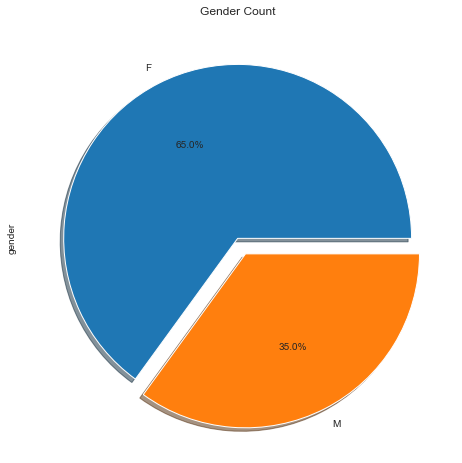

In [3]:
#count of patients that booked an appointment by gender
count = df_clean.gender.value_counts()
#plotting a piechart
df_clean.gender.value_counts().plot.pie(title = 'Gender Count', legend = False, \
                                  autopct = '%1.1f%%', explode = (0,0.1), \
                                  shadow = True, figsize = (8,8), startangle = 0)
print(count)

The piechart shows that females booked the most appointments.

### **Create arrays for female and male bar heights, with this height being based on the proportions of samples of that gender and that no-show unique value**

In [11]:
#get the total_count of gender that booked an appointment
gender_total = df_clean.groupby('gender')['no-show'].count()
gender_total

gender
F    71839
M    38687
Name: no-show, dtype: int64

In [9]:
#select the gender count in
#each unique value of no-show column
gender_count = df_clean.groupby(['gender', 'no-show'])['age'].count()
gender_count

gender  no-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: age, dtype: int64

In [12]:
#find the female proportion of gender that missed or showed up for the appointment
female_proportion = gender_count['F']/gender_total['F']
female_proportion

no-show
No     0.796851
Yes    0.203149
Name: age, dtype: float64

In [13]:
#find the male proportion of gender that missed or showed up for the appointment
male_proportion = gender_count['M']/gender_total['M']
male_proportion

no-show
No     0.800321
Yes    0.199679
Name: age, dtype: float64

In [14]:
#x coordinate location for each no-show unique value
index = np.arange(len(female_proportion))

#width of each bar
width = 0.35


Creating the plot

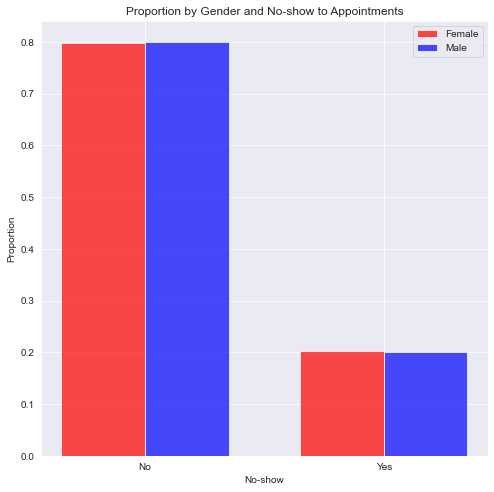

In [16]:
#Using matplotlib.pyplot, plot a barchart to express proportions
plt.figure(figsize = (8,8))     #Figure size
female_bar = plt.bar(index, female_proportion, width, color = 'r', alpha = .7, label = 'Female')
male_bar = plt.bar(index+width, male_proportion, width, color = 'b', alpha = .7, label = 'Male')
plt.xlabel('No-show')
plt.ylabel('Proportion')
plt.title('Proportion by Gender and No-show to Appointments')
plt.legend()
#xticks location
locations = index + width / 2
#xticks label
labels = ['No', 'Yes']
plt.xticks(locations, labels);

From the chart, it can be seen that much difference doesn't exist between the proportion of male and female gender that showed up and that missed the appointment.  

### Research Question 2: Does being handicap affect the presence or absence of patients?

I'm going to create two sets of dataframes representing those that missed the appointment and those that showed up.

In [3]:
# create dataframes
df_clean_missed = df_clean[df_clean['no-show'] =='Yes']
df_clean_show = df_clean[df_clean['no-show'] == 'No']                            

In [4]:
#get the column of missed and show that
#will be used for the histogram plot
x = df_clean_missed.handicap
y = df_clean_show.handicap

In [23]:
#Wrapping up plot code in a function
#to avoid repetitive codes
def plot_chart(x_array, y_array, title, xlabel, ylabel, figsize = (8,8), alpha = 0.5, label1 = 'missed', label2 = 'show'):
    plt.figure(figsize = figsize)
    plt.hist(x_array, alpha = alpha, label = label1)
    plt.hist(y_array, alpha = alpha, label = label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

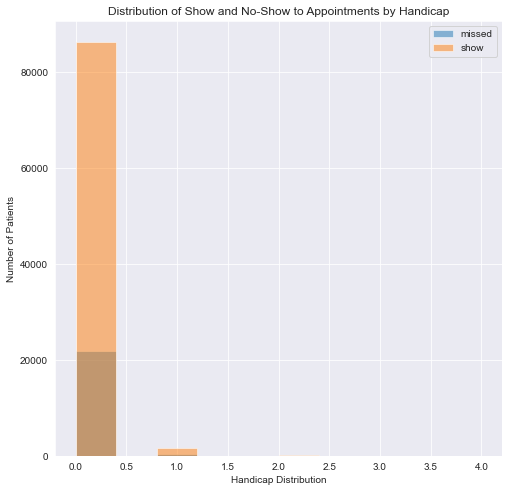

In [21]:
#Plotting the histogram for both missed and show
plot_chart(x, y, 'Distribution of Show and No-Show to Appointments by Handicap', 'Handicap Distribution', 'Number of Patients')

The chart shows that those with no handicap showed up more for their appointments.

### Research Question 3:Which neighbourhood had the most no shows to appointment?

In [26]:
#To get the neighbourhood with max_missed
#view the unique value counts of neighbourhood in df_clean_missed
df_clean_missed.neighbourhood.value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
JESUS DE NAZARETH               696
JARDIM DA PENHA                 631
CARATOÍRA                       591
TABUAZEIRO                      573
BONFIM                          550
ILHA DO PRÍNCIPE                532
ANDORINHAS                      521
SÃO PEDRO                       515
SANTO ANDRÉ                     508
SANTA MARTHA                    496
SANTO ANTÔNIO                   484
ROMÃO                           474
GURIGICA                        456
JABOUR                          451
DA PENHA                        429
SÃO JOSÉ                        428
MARUÍPE                         424
NOVA PALESTINA                  402
BELA VISTA                      384
SANTOS DUMONT                   369
SÃO CRISTÓVÃO                   363
ILHA DE SANTA MARIA             361
FORTE SÃO JOÃO              

The value_counts function sorts the unique values of a dataframe by counts in descending order, starting from the highest to the lowest.

### Research Question 4: Does age affect the possibility of a patient showing up for the appointment?

**Do younger people miss appointments the most? Do older patients keep to their appointments?**

To answer this questions, i'm going to make use of the two dataframes filtered by yes to no-show and no to no-show in Q2 and view the age distribution using histogram. 

In [24]:
#Set the column of missed and show that
#will be used for the histogram plot
x = df_clean_missed.age
y = df_clean_show.age

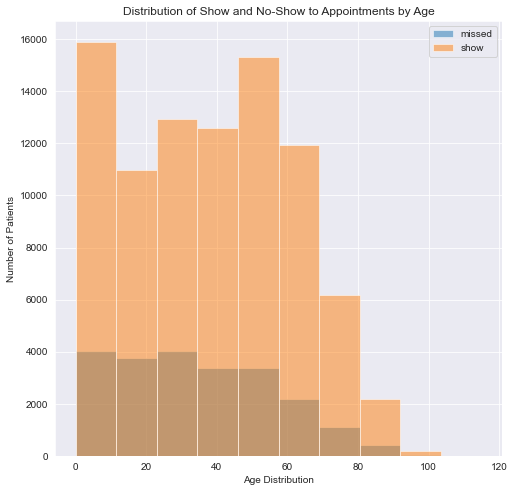

In [25]:
#plot the histogram for both missed and show
plot_chart(x, y, 'Distribution of Show and No-Show to Appointments by Age', 'Age Distribution', 'Number of Patients')

There is no much  differenence between the distribution of Age of patients who showed up for the appointment and the patients that did not show up for the appointment.

### Research Question 5: Is no-show affected by the whether or not a patient received an sms as a reminder?

In [5]:
#Set the column of missed and show that
#will be used for the barchart plot
sms_by_missed = df_clean_missed.sms_received.value_counts()
sms_by_show = df_clean_show.sms_received.value_counts()

In [6]:
#x coordinate location for each show unique value
ind = np.arange(len(sms_by_show))

#width of bar
width = 0.4

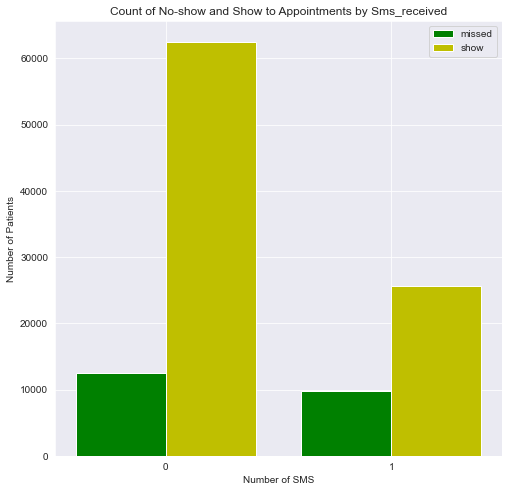

In [8]:
#Figure size
plt.figure(figsize = (8,8))

#plot bar chart for each of missed and showed by sms
sms_missed_bar = plt.bar(ind, sms_by_missed, width, label = 'missed', color = 'g')
sms_show_bar = plt.bar(ind + width, sms_by_show, width, label = 'show', color = 'y')

locations = ind + width / 2  #xticks locations
labels = ['0', '1']
plt.xticks(locations, labels) 

#Title and labels
plt.title('Count of No-show and Show to Appointments by Sms_received')
plt.xlabel('Number of SMS')
plt.ylabel('Number of Patients')
plt.legend();

Majority of those that showed up for the appointment did not receive an SMS.

<a id='conclusions'></a>
## Conclusions

#### The results from the analysis suggests that;
- Out of the 14 attributes, no-show was the dependent variable while the others were independent.
- The female gender cares most for their body as they booked more appointments and they kept to the appointments as much as the males did.
- Majority that showed up for the appointments were not handicapped in any way.
- For reasons that could'nt be seen on the data, patients from the Jardim Camburi neighbourhood had the most no turn-up for appointments
- Also, there was no much difference in the age distribution of those that showed up for or missed their appointment. Though, the chart showed that kids(0-10 years) and adults(50-60 years) showed up more for the appointments, likely, because they were being taken cared of.
- It cannot be said for sure that absence to appointments is related to a patient not being reminded by SMS, as majority that showed up never received one.


#### Limitation(s)
- Since most of the data were in categorical form, i was unable to plot a scatter matrix to ascertain correlations.
- Also, i worked with descriptive statistics of the data. Hence, i was unable to create hypotheses or make inferences with the data.


In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project 1.ipynb'])

1